In [40]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from numpy import nan as Nan
from sklearn.linear_model import LinearRegression
from statsmodels . tsa . holtwinters import ExponentialSmoothing



# Procesamiento de los Fondos


In [3]:
emisoras = ['ACTICOB', 'ACTIGOB', 'ACTIMED', 'ACTIREN', 'ALTERNA', 'IMPULSA',
       'ACTI500', 'MAYA', 'ACTVIDA']

Vamos a crear una lista de tuplas, una tupla es una pareja de valores (x,y).  
(nombre del fondo, prediccion por historial de precios)  
lista_emisoras = [('ACTICOB',x1), ('ACTIGOB',x2), ('ACTIMED',x3), ('ACTIREN',x4), ('ALTERNA',x5) , ('IMPULSA',x5)
       ('ACTI500',x6), ('MAYA',x7) ('ACTVIDA',x8)]






In [4]:
emisoras = [
            ('ACTIGOB',None),
            ('ACTIMED',None), 
            ('ACTIREN',None), 
            ('ALTERNA',None),
            ('ACTVIDA',None),
            ('IMPULSA',None),
            ('MAYA',None), 
            ('ACTICOB',None),
            ('ACTI500',None) 
            ]

In [5]:
preciosB2 = pd.read_csv("precios-B2.csv",sep=',')
preciosB2

,Fecha,Emisora,Serie,Precio
0,20161201,ACTICOB,B-2,26.208114
1,20161201,ACTIGOB,B-2,3.982440
2,20161201,ACTIMED,B-2,4.409726
3,20161201,ACTIREN,B-2,7.491280
4,20161201,ALTERNA,B-2,3.342991
...,...,...,...,...
5938,20191213,MAYA,B2,31.985886
5939,20191217,MAYA,B2,32.955200
5940,20191224,MAYA,B2,32.873076
5941,20200106,MAYA,B2,33.232250


## Actigob

('ACTICOB', None)
coefficient of determination: 0.0004189231975816332


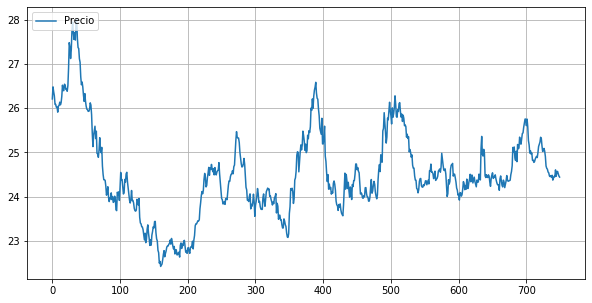

In [36]:

emisora = emisoras[0]
print(emisora)
emisora = emisora[0]
historico = preciosB2[preciosB2.Emisora == emisora].sort_values(by='Fecha')
#print(historico.head(10).to_string())
historico = historico.groupby(by="Fecha").sum()
#print(historico.head(10).to_string())


historico = historico.reset_index()
#print(historico.Precio.head(50).to_string())

y = historico.Precio.values
x = historico.Precio.index.values
#print(y)

x = x.reshape((-1, 1))

model = LinearRegression()
model = model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

plt.figure(figsize=[10,5])
plt.grid(True)
plt.plot(historico['Precio'],label='Precio')
plt.legend(loc=2)


In [7]:
y_pred = model.predict([[751]])
print('predicted response:', y_pred)

predicted response: [4.59121871]


### Annualized returns 

In [33]:
dias = historico.shape[0]

# En total tenemos 63 meses
meses = 63

# Calculamos el retorno total del portafolio
retorno_total = (historico.tail(1).Precio.values[0] - historico.head(1).Precio.values[0])/ historico.head(1).Precio.values[0]

print("retorno total",retorno_total)

# Calculamos los retornos annualizados en los meses
retorno_annualizado = ((1 + retorno_total) ** (12/meses))-1

print("retorno anualizado",retorno_annualizado)


retorno total 0.15751247978626168
retorno anualizado 0.02825334248753797


## Acticob

In [62]:
series

0      26.208114
1      26.480729
2      26.370676
3      26.279367
4      26.085753
         ...    
745    24.545196
746    24.568560
747    24.516503
748    24.465115
749    24.440443
Name: Precio, Length: 750, dtype: float64

In [95]:

emisora = emisoras[-2]
print(emisora)
emisora = emisora[0]
historico = preciosB2[preciosB2.Emisora == emisora].sort_values(by='Fecha')
#print(historico.head(10).to_string())
historico = historico.groupby(by="Fecha").sum()
#print(historico.head(10).to_string())


historico = historico.reset_index()
#print(historico.Precio.head(50).to_string())



series = historico
series['Fecha'] = pd.to_datetime(historico['Fecha'],format='%Y%m%d')
series = series.set_index('Fecha')
#series

series.sort_values(by="Fecha")

('ACTICOB', None)


,Precio
Fecha,
2016-12-01,26.208114
2016-12-02,26.480729
2016-12-05,26.370676
2016-12-06,26.279367
2016-12-07,26.085753
...,...
2019-11-05,24.545196
2019-11-06,24.568560
2019-11-07,24.516503


In [108]:
series_train = historico.Precio.head(600)
series_test = historico.Precio.tail(150)


n = 150
hw = ExponentialSmoothing (( series ) ,seasonal_periods =12).fit()

# prediccion
train, test = series[:-n], series[len( series )-n:]
 
# train, test = series_train, series_test


print("####### VALOR #########")
print("valor", series.tail(1))
hw_p = hw.predict( start = test.index[0] , end = test.index [ -1])


print(pd.to_datetime("20191112",format='%Y%m%d'))

hw_p = hw.predict( start = pd.to_datetime("20191112",format='%Y%m%d') , end = pd.to_datetime("20191112",format='%Y%m%d'))
#


print("####### VALOR HW #########")
print(hw_p)



print("################")
plt.figure(figsize=[10,5])
plt.grid(True)

plt.legend(loc=2)
plt.plot( train.index , train , label ='Train ')
plt.plot( test.index , test , label =  'Test' )
plt.plot( hw_p.index , hw_p , label = 'H-W ')
plt.legend( loc = 'best' )

####### VALOR #########
valor                Precio
Fecha                
2019-11-11  24.440443
2019-11-12 00:00:00
C:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
'''
y = historico.Precio.values
x = historico.Precio.index.values
#print(y)

x = x.reshape((-1, 1))

model = LinearRegression()
model = model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


'''

# Procesamiento Clientes


In [8]:
fondos = pd.read_csv("clientes.csv",sep=',')
fondos

,BP_Único_y/o_Repetido,CLAVE_CLIENTE,CATEGORIA_PRODUCTO,DETALLE_PRODUCTO,POSICION_CUENTA_FECHA_TRANS
0,Único,90000175,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","202,017"
1,Repetido,90001470,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","3,643"
2,Repetido,90001801,FONDOS DE DEUDA,"ACTIGOBER, S.A. DE C.V. SOC INV INSTRUM DE DEUDA","133,605"
3,Repetido,90001991,FONDOS DE COBERTURA,ACTICOB B,897
4,Repetido,90001991,RENTA VARIABLE,"FONDO MAYA,S.A DE C.V.,SOC. DE INV. DE RENTA V...","265,258"
...,...,...,...,...,...
41453,Repetido,97509467,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","45,010"
41454,Repetido,97509483,FONDOS DE DEUDA,"ACTIGOBER, S.A. DE C.V. SOC INV INSTRUM DE DEUDA","4,498"
41455,Repetido,97509608,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","49,999"
41456,Repetido,97516819,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","49,999"


In [9]:
fondos = fondos.head(20000)
fondos

,BP_Único_y/o_Repetido,CLAVE_CLIENTE,CATEGORIA_PRODUCTO,DETALLE_PRODUCTO,POSICION_CUENTA_FECHA_TRANS
0,Único,90000175,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","202,017"
1,Repetido,90001470,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","3,643"
2,Repetido,90001801,FONDOS DE DEUDA,"ACTIGOBER, S.A. DE C.V. SOC INV INSTRUM DE DEUDA","133,605"
3,Repetido,90001991,FONDOS DE COBERTURA,ACTICOB B,897
4,Repetido,90001991,RENTA VARIABLE,"FONDO MAYA,S.A DE C.V.,SOC. DE INV. DE RENTA V...","265,258"
...,...,...,...,...,...
19995,Repetido,93120632,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","4,089"
19996,Repetido,93120681,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","208,435"
19997,Repetido,93120699,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","10,002"
19998,Repetido,93120699,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","195,971"


 - Tomamos las claves unicas de cliente
    - querys
 - para c in claves crear el df de sus productos
 - Calcular rendimientos de ese portafolio

In [10]:
claves_unicas= fondos.CLAVE_CLIENTE.unique()
#len(claves_unicas)


#16395
for i in range(3,4):
    aux = fondos[fondos.CLAVE_CLIENTE == claves_unicas[i]].reset_index(drop=True)
    print(aux.to_string())












    aux = pd.DataFrame()



  BP_Único_y/o_Repetido  CLAVE_CLIENTE   CATEGORIA_PRODUCTO                                       DETALLE_PRODUCTO POSICION_CUENTA_FECHA_TRANS
0              Repetido       90001991  FONDOS DE COBERTURA                                              ACTICOB B                        897 
1              Repetido       90001991       RENTA VARIABLE  FONDO MAYA,S.A DE C.V.,SOC. DE INV. DE RENTA VARIABLE                    265,258 
2              Repetido       90001991      FONDOS DE DEUDA       ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA                         10 
